<a href="https://colab.research.google.com/github/hellen2021/House-pricing-Hass-Consulting-Company/blob/main/Supervised_Learning_Linear_Regression_Hellen_CheptooIP_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question
## a) Specifying the Question
To study the factors that affect housing prices and creating a model that would allow the company to accurately predict the sale prices.

## b) Defining the Metric for Success
Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## c) Understanding the context
This project is being done on behalf of Hass Consulting Company, a real estate leader with over 25 years of experience. We have been tasked with studying the factors that affect housing; and creating a model that would allow the company to accurately prediact the sale prices.

## d) Recording the Experimental Design
In this study, I'll be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables.

For regression analysis, I'll implement the following regression techniques and compare their performances.

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression

### Import the necessary libraries

In [133]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Load data

In [134]:
dataset_url = 'http://bit.ly/IndependentProjectWeek7Dataset'
housing = pd.read_csv(dataset_url)

### Preview and explore the dataset

In [135]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [136]:
# Previewing the bottom of our dataset
# 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [137]:
# Determining the no. of records in our dataset
housing.shape

(21613, 20)

In [138]:
# Checking whether each column has an appropriate datatype
#
housing.dtypes

#All columns have the right data types

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning

In [139]:
# Identifying the Missing Data
#

housing.isnull().sum()

# There are no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [140]:
# Checking for duplicates
#
housing.duplicated().sum()

3

In [141]:
# Removing duplicates

housing.drop_duplicates(inplace=True)

In [142]:
# Checking for columns where all values are zero
zero_cols = [ col for col, is_zero in ((housing == 0).sum() == housing.shape[0]).items() if is_zero ]

zero_cols

[]

In [143]:

# Dropping irrelevant columns
housing.drop(columns=['id', 'lat', 'long', 'waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

In [144]:
# Checking for Outliers
#

Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323387.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1124.50
sqft_lot           5648.75
floors                1.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
yr_built             46.00
zipcode              85.00
sqft_living15       870.00
sqft_lot15         4983.00
dtype: float64


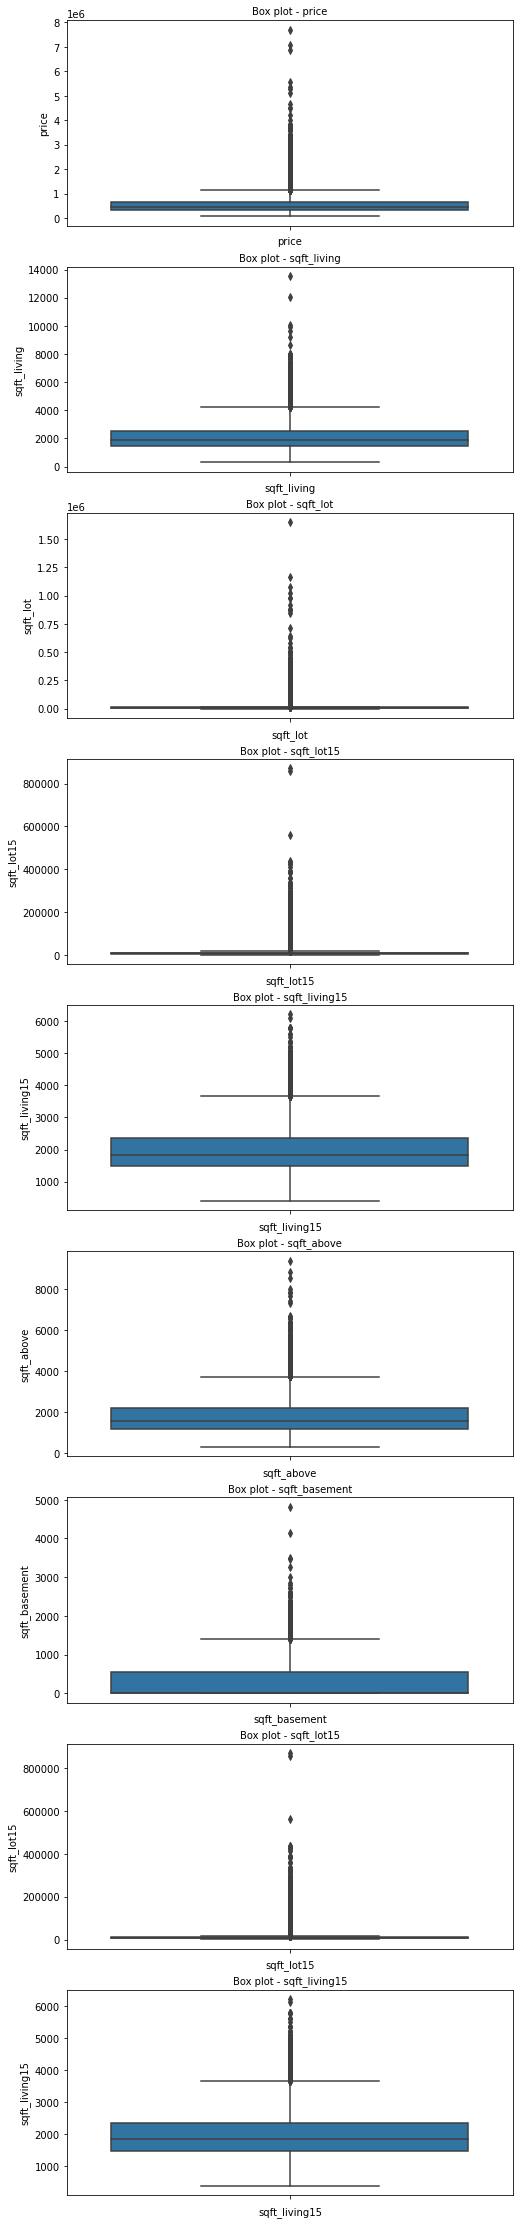

In [145]:
#Plotting the box plot for columns with outliers

col_names = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=housing[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [146]:
# Removing outliers
housing = housing[~((housing < (Q1 - 1.5 * IQR)) |(housing > (Q3 + 1.5 * IQR))).any(axis=1)]
housing.shape

(16612, 14)

In [147]:
# More data cleaning procedures
#
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16612 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16612 non-null  float64
 1   bedrooms       16612 non-null  int64  
 2   bathrooms      16612 non-null  float64
 3   sqft_living    16612 non-null  int64  
 4   sqft_lot       16612 non-null  int64  
 5   floors         16612 non-null  float64
 6   condition      16612 non-null  int64  
 7   grade          16612 non-null  int64  
 8   sqft_above     16612 non-null  int64  
 9   sqft_basement  16612 non-null  int64  
 10  yr_built       16612 non-null  int64  
 11  zipcode        16612 non-null  int64  
 12  sqft_living15  16612 non-null  int64  
 13  sqft_lot15     16612 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.9 MB


## Exploratory Data Analysis
### Univariatte Analysis

In [148]:
# Ploting the univariate summaries and recording our observations
#
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.661200e+04,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000
mean,4.524053e+05,3.269083,1.984574,1838.827354,7054.684987,1.466079,3.417108,7.401637,1590.670178,248.157176,1969.976764,98081.933843,1815.761558,6932.756381
std,1.895564e+05,0.775242,0.649025,623.932141,3384.975688,0.544185,0.644826,0.811774,599.165058,366.895185,29.705813,54.046737,514.988225,3015.852296
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,620.000000,651.000000
25%,3.055000e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,3.000000,7.000000,1150.000000,0.000000,1950.000000,98033.000000,1440.000000,4820.000000
50%,4.190000e+05,3.000000,2.000000,1770.000000,7029.500000,1.000000,3.000000,7.000000,1440.000000,0.000000,1971.000000,98074.000000,1720.000000,7169.000000
75%,5.641125e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,4.000000,8.000000,1920.000000,500.000000,1997.000000,98119.000000,2130.000000,8744.000000
max,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,5.000000,9.000000,3740.000000,1400.000000,2015.000000,98199.000000,3640.000000,17550.000000


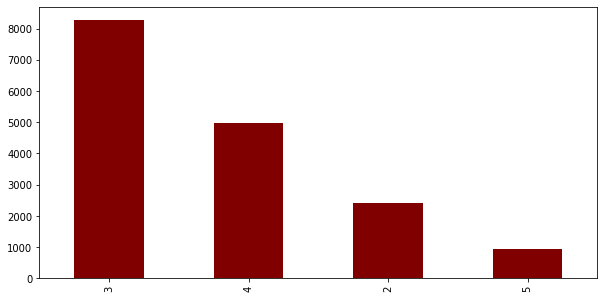

In [149]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
housing['bedrooms'].value_counts().plot(kind = 'bar', color = 'maroon')

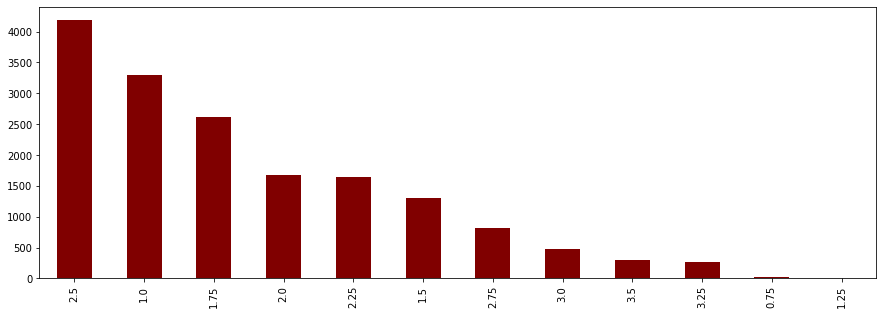

In [150]:
plt.figure(figsize = (15,5))
housing['bathrooms'].value_counts().plot(kind = 'bar', color = 'maroon')

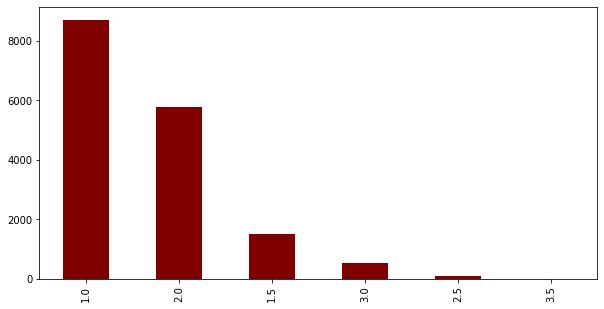

In [151]:
plt.figure(figsize = (10,5))
housing['floors'].value_counts().plot(kind = 'bar', color = 'maroon')

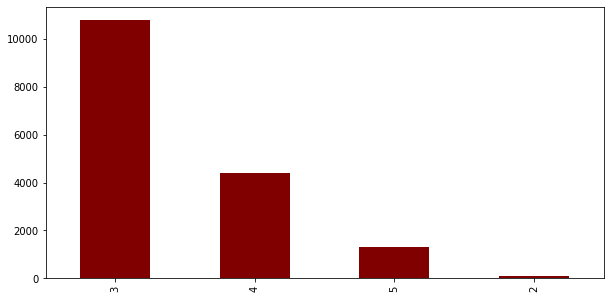

In [152]:
plt.figure(figsize = (10,5))
housing['condition'].value_counts().plot(kind = 'bar', color = 'maroon')

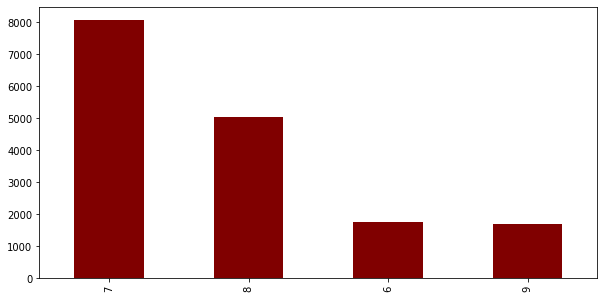

In [153]:

plt.figure(figsize = (10,5))
housing['grade'].value_counts().plot(kind = 'bar', color = 'maroon')

### Observations
1. Most of the houses owned by the Hass Consultig company are three bedroomed.
2. Most of the houses owned by the company have 2.5 bathrooms.
3. Most of the houses have one floor.
4. Most of their houses are grade 7.

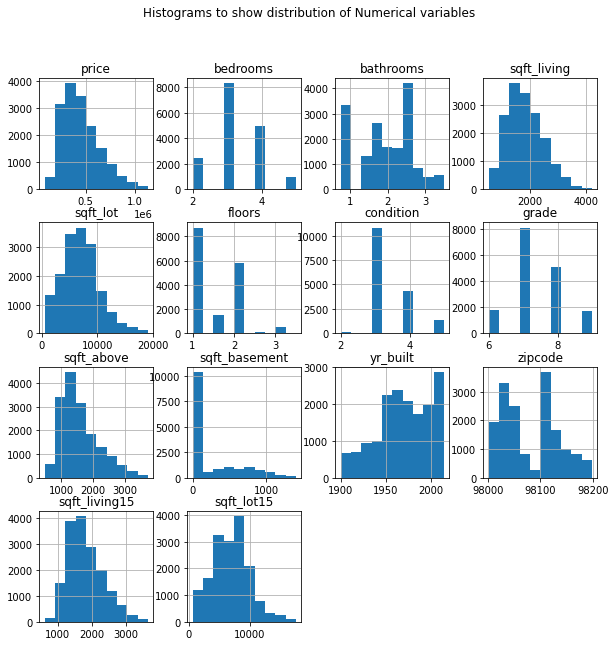

In [154]:
##Checking for data distribution
housing.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

### Bivariatte Analysis

In [155]:
#Correlation matrix.

matrix = housing.corr()
matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.240482,0.351898,0.525741,-0.076376,0.219632,0.080447,0.535590,0.399446,0.241738,-0.056643,0.031208,0.459757,-0.084993
bedrooms,0.240482,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.351898,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.525741,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,-0.076376,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.219632,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.080447,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.535590,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.399446,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.241738,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950


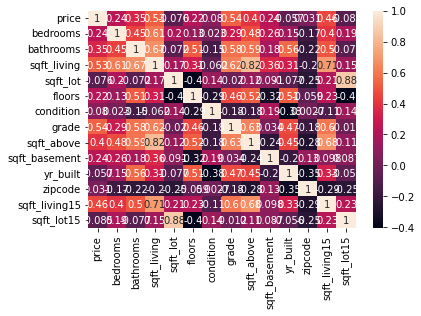

In [156]:
#Plottting a heatmap to show correlation of different numerical variables
sns.heatmap(housing.corr(), xticklabels = housing.corr().columns, yticklabels = housing.corr().columns, annot=True)

### Observations
Using a threshold of 0.5, we observe that:

1. The price has a high Correlation with the following columns: square foot living, grade with the correlation above 0.5
2. The grade has a high correlation with the number of bathrooms and bedrooms and the Square feet area of living area
3. The number of floors and the number of bathrooms are highly correlated
4. The number of bathrooms, the grade and the Square feet area of living area

## Detecting Multicollinearity

In [157]:
# Checking for multicollinearity on the independent variables only

F = housing.drop('price', 1)
correlations = F.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950
yr_built,0.151101,0.556519,0.314758,-0.076768,0.513873,-0.377120,0.470836,0.449356,-0.198561,1.000000,-0.351713,0.329910,-0.055767


## Computing the Variance Inflation Factor(VIF)


In [158]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.687836,-0.322455,4.970913e-01,-0.067188,0.013406,-0.034370,0.217844,-1.456813e+00,-8.751902e-01,0.109964,0.078029,0.094230,-0.107062
bathrooms,-0.322455,2.861101,-1.118537e+00,0.053501,-0.692755,-0.131244,-0.227338,2.158580e-01,-3.630339e-01,-0.883535,0.103587,-0.055131,0.137129
sqft_living,0.490850,-1.116746,-9.551235e+13,-0.463753,-0.246399,0.227224,-0.435152,9.172097e+13,5.616480e+13,0.748606,0.267443,0.984576,-0.155579
sqft_lot,-0.067188,0.053501,-4.676001e-01,4.555009,0.440017,0.020231,0.090251,-1.200402e-01,1.711139e-01,0.109546,0.175950,0.148985,-3.720152
floors,0.013406,-0.692755,-2.516427e-01,0.440017,2.650666,0.077957,-0.316545,-5.299294e-01,7.591679e-01,-0.419044,-0.187321,0.254424,0.514677
condition,-0.034370,-0.131244,2.303745e-01,0.020231,0.077957,1.237384,-0.001715,-2.007884e-01,-2.344920e-01,0.496791,0.165728,0.102844,-0.112170
grade,0.217844,-0.227338,-4.411637e-01,0.090251,-0.316545,-0.001715,2.205778,-3.352074e-01,-1.204049e-01,-0.341202,-0.066191,-0.588175,-0.025836
sqft_above,-1.447340,0.217231,9.172097e+13,-0.122740,-0.532782,-0.198838,-0.339994,-8.808009e+13,-5.393532e+13,-0.469260,-0.257267,-2.426555,0.233181
sqft_basement,-0.871949,-0.371672,5.616480e+13,0.171598,0.762944,-0.233266,-0.122180,-5.393532e+13,-3.302698e+13,-0.091716,-0.402829,-1.108955,0.222171
yr_built,0.109964,-0.883535,7.462439e-01,0.109546,-0.419044,0.496791,-0.341202,-4.669914e-01,-9.032705e-02,2.158491,0.490466,0.012752,-0.244983


From this we observe that sqft_living, sqft_above have a VIF factor above 5. So, I'll remove the sqft_living and sqft_above features and see how they affect our accuracy, compared to accuracy when we leave them in.

In [159]:
# This is the version that excludes the 2 variables

# Subsetting the data
X = housing[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
from sklearn.metrics import r2_score
from sklearn import metrics

y_pred = regressor.predict(X_test)

print("For the model excluding both sqft_living and sqft_above:")
print("         The R2 score is:", r2_score(y_test, y_pred))
print('         Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding both sqft_living and sqft_above:
         The R2 score is: 0.5151109915656631
         Root Mean Squared Error: 132393.44764778885


The predicted values are a bit off. The 2 features that the VIF function recommended for dropping are the key indicators for square footage, so we cannot possibly make predictions without them. This proves that.

Let's try it with just the _sqftabove feature, which has a lower correlation index compared to _sqftliving. Modifications are made by adding and subtracting features from X and y above.

In [160]:
# This is the version that includes sqft_above ONLY

# Subsetting the data
#X = y_pred = regressor.predict(X_test)
X = housing[['bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
#y = y_pred = regressor.predict(X_test)
y = housing['price']


# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predictions
y_pred = regressor.predict(X_test)
# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_living only:")
print("        The R2 score is:", r2_score(y_test, y_pred))
print('        Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_living only:
        The R2 score is: 0.5241707950185682
        Root Mean Squared Error: 131150.77735592556


In [161]:
# This is the version that includes sqft_living ONLY

# Subsetting the data
#X = y_pred = regressor.predict(X_test)
X = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing['price']
# y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predictions

y_pred = regressor.predict(X_test)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.5241707950185677
          Root Mean Squared Error: 131150.77735592565


In [164]:
# This is the version that includes both sqft_above and sqft_living 

# Subsetting the data
X = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing['price']


# Dividing our data into training and test sets
# ---
# 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
regressor = LinearRegression()
regressor.fit(X_train_all, y_train_all)

# predictions 
y_pred_all = regressor.predict(X_test_all)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred_all = regressor.predict(X_test_all)

print("For the model including both sqft_living and sqft_above:")
print("           The R2 score is:", r2_score(y_test, y_pred))
print('           Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model including both sqft_living and sqft_above:
           The R2 score is: 0.5241707950185677
           Root Mean Squared Error: 131150.77735592565


The difference between the R2 scores for the models including or excluding one of the variables have a very small marginal difference. This shows that the 2 variables being multicollinear does not affect the linear model. Thus I'll choose the square foot of the living area to continue with the analysis henceforth.

## Residual Plots and Heteroscedasticity Test

In [165]:
# Splitting our data into training and test sets

X =  housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [166]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [167]:
# This is our prediction for price based on our model
y_predict = a = regressor.predict(X_test)

# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

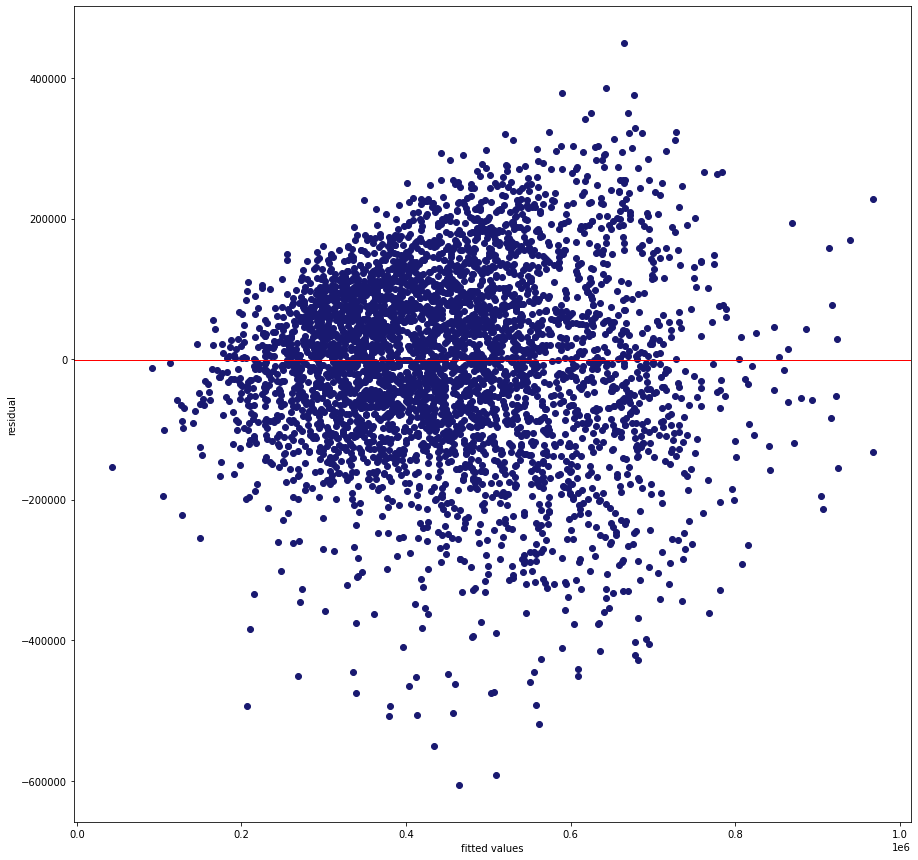

In [168]:
## Building the residual plot

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
plt.scatter(y_predict, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average.

## Barlett's Test of Heteroscedasticity

In [169]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The critical value is:", critical_value)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The critical value is: 4434.1150227222215
The variances are homogeneous.


In [170]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 130705.56995099802
The R2 score for the linear model is: 0.5236251614318701


# Modelling
## 1. Multiple Linear Regression

In [171]:
#separating independent and dependent variable
#X = df1.iloc[:,1:].values
#y = df1.iloc[:,0].values
X = housing.iloc[:,1:-1].values
y = housing.iloc[:,-1] .values

In [172]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [173]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

1981572.5854375025


In [174]:
# regression coefficient
regressor.intercept_

85852.47224040872

In [175]:
# regression coeefficient
regressor.coef_

array([ 1.00445063e+02, -1.64267067e+02, -1.00488637e-01,  7.20451346e-01,
       -6.03371828e+02,  1.20533983e+02,  2.43935597e+01,  2.06265801e-02,
       -1.21115217e-01,  5.48560193e+00, -9.70687278e-01,  4.78268441e-01])

In [176]:
for i in range(4):
    print(regressor.coef_[i])

100.44506314582813
-164.26706680557484
-0.10048863702702704
0.7204513455790504


In [177]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,3323.000000,3323.000000
mean,6934.640385,6927.107416
std,3051.404312,2676.895313
min,748.000000,1297.479975
25%,4802.000000,5110.376067
50%,7191.000000,6974.197028
75%,8722.000000,8502.056330
max,17494.000000,16421.571928


In [178]:

# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 958.4858533217973
Mean Squared Error: 2019902.4064409104
Root Mean Squared Error: 1421.2327066462094


In [179]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

1404.2748900914767

In [180]:
# regressor score
regressor.score(X_train,y_train)

0.7818945342349146

In [181]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

1422.799748836002

In [182]:
# findning the random states
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)<1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

0.43086145130155273
RandomState: 2
0.2843213200487753
RandomState: 3
0.1726563005902335
RandomState: 7
0.18359619238435698
RandomState: 12
0.43765620467888766
RandomState: 21
0.59554614642866
RandomState: 23
0.28095408634794694
RandomState: 26
0.3998186465746585
RandomState: 28
0.6825472965340396
RandomState: 31
0.34500481670670524
RandomState: 34
0.7396302591864696
RandomState: 35
0.5662827403411939
RandomState: 39
0.8411162462059565
RandomState: 42
0.86617633718447
RandomState: 44
0.9705039651207699
RandomState: 45
0.9429727107230974
RandomState: 49
0.012655303916062621
RandomState: 55
0.015064939864032567
RandomState: 56
0.589484475992549
RandomState: 63
0.07120021259197529
RandomState: 69
0.9659362373906788
RandomState: 71
0.01989851588223246
RandomState: 73
0.0369963709727017
RandomState: 76
0.9837916412579943
RandomState: 78
0.627548005735207
RandomState: 81
0.17184320484943783
RandomState: 84
0.881469589256767
RandomState: 88
0.28864873144084413
RandomState: 92
0.794330292329959

## 2. Quantile Regression

In [183]:
# recalling the base model
print(first_model)

1981572.5854375025


In [184]:
# We will use the python package statsmodels for Quantile Regression

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 2.55e+05 and our slope or the coefficient for our x is  4.75e+04. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.02172
Model:                       QuantReg   Bandwidth:                   3.624e+04
Method:                 Least Squares   Sparsity:                    4.863e+05
Date:                Sun, 24 Apr 2022   No. Observations:                16612
Time:                        21:37:34   Df Residuals:                    16610
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.501e+05   8176.863     30.586      0.000    2.34e+05    2.66e+05
bedrooms     5.23e+04   2433.777     21.489      0.000    4.75e+04    5.71e+04


## 3. Ridge Regression

In [185]:
X = housing.iloc[:,1:-1].values
y = housing.iloc[:,-1] .values

In [186]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [187]:

# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

1993298.0071168914

In [188]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

1982108.634845074


## 4. Lasso Regression

In [189]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [190]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.78214274190339
lasso MSE: 1981372.0155184406
lasso coef: [ 8.70795271e+01 -1.32629280e+02  3.06193130e-01  7.22682975e-01
 -6.14223775e+02  1.11330422e+02  1.61012801e+01 -3.99056632e-01
 -5.37838203e-01  5.33063722e+00 -8.82316338e-01  4.88317804e-01]


In [191]:
# split data into training and test sets, and choose a set of parameters 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.7901955211414088
linear score: 0.7901926073065326
lasso MSE: 1979046.8541361524
linear MSE: 1979074.3398017415
lasso best estimator coef: [ 1.01167539e+02 -1.43488762e+02  3.12391699e-01  7.16254568e-01
 -6.36325174e+02  1.13988549e+02  2.31084265e+01 -3.81337314e-01
 -5.55583151e-01  5.23242652e+00 -1.10297512e+00  4.73865417e-01]
linear coef: [ 1.01533823e+02 -1.44099542e+02 -1.04093564e-01  7.16192994e-01
 -6.37049252e+02  1.14279686e+02  2.35898786e+01  3.52436533e-02
 -1.39337217e-01  5.24116511e+00 -1.10213239e+00  4.73688317e-01]


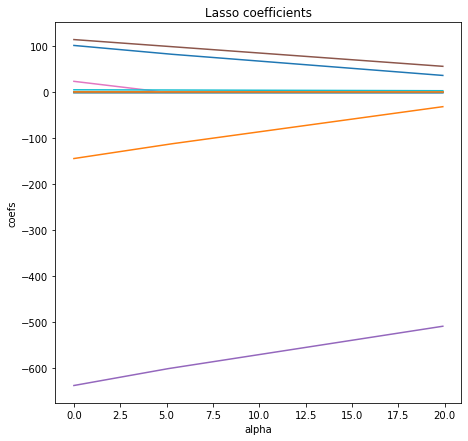

In [192]:
# instantiate
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## Elastic Net Regression

In [193]:
# Creating our linear regression model for the purpose of comparison
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

1981572.5854375025


In [194]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [195]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

2001071.6758363447

In [196]:
X = housing.iloc[:,1:-1].values
y = housing.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

2017859.2807873948


In [197]:
print(regr.coef_)

[  33.11373101  -56.87418752    0.32870101    0.75627595 -127.98597474
   49.01840686  -15.48749174   -0.61691057   -0.45874565    1.70278478
   -1.38313665    0.52875178]


In [198]:
print(regr.intercept_)

133573.75843170445


In [199]:
housing.shape

(16612, 14)

In [202]:
#print(regr.predict([[0,1,2,3,4,5,6,7]]))

From the models and computations above, it was realised that the mean squared errors for th models were:

1. Mean Squared Error: 0.008810835164347339 for multiple linear regression
2. Pseudo R-squared: for quantile regression 0.02035 for quantile regression
3. MSE for ridge regression: 0.008866260421402749
4. lasso MSE: 0.00933824890445654
5. Elastic net MSE: 0.009033355731789585

Conclusively, the appropriate prediction model for the housing prices is the multiple linear regression, a model that was used as the base comparison model.

these models were okay but the model that i would provide Hass consulting Company with will be the multiple regression model.

this is becuse this model would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.